<a href="https://colab.research.google.com/github/guptuv/Artificial-Neural-Network-ANN-/blob/main/Gradient_Descent_Intuition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Gradient Descent Intuition from Scratch***

In [6]:
from sklearn.datasets import make_regression
import numpy as np

In [9]:
X,y = make_regression(n_samples=10, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

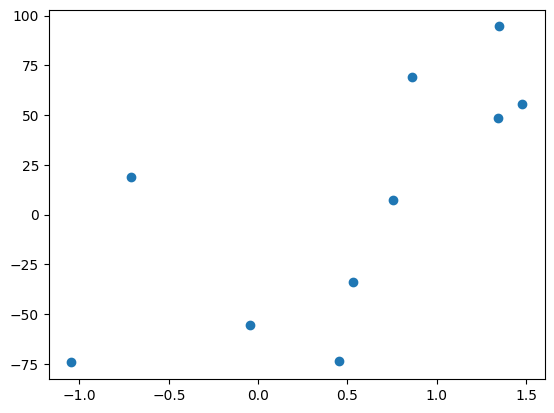

In [10]:
plt.scatter(X,y)

In [12]:
from sklearn.linear_model import LinearRegression #ols


reg = LinearRegression()
reg.fit(X,y)


LinearRegression()

In [15]:

print(reg.coef_)
print(reg.intercept_)

[48.53048884]
-18.451671098764226


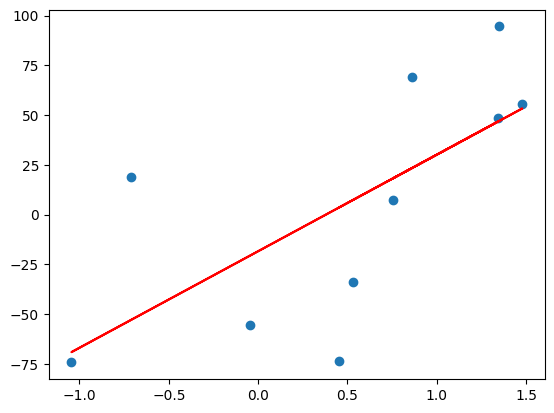

In [16]:

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [19]:
y_pred = ((78.35 * X) + 100).reshape(10)

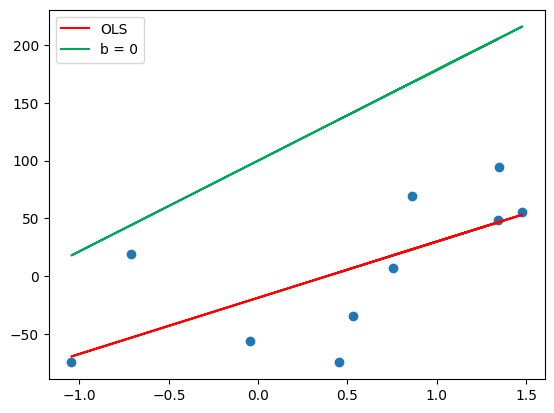

In [20]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [21]:

m = 78.35
b = 100

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

2665.489009709456

In [22]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

266.54890097094557

In [23]:
b = b - step_size
b


-166.54890097094557

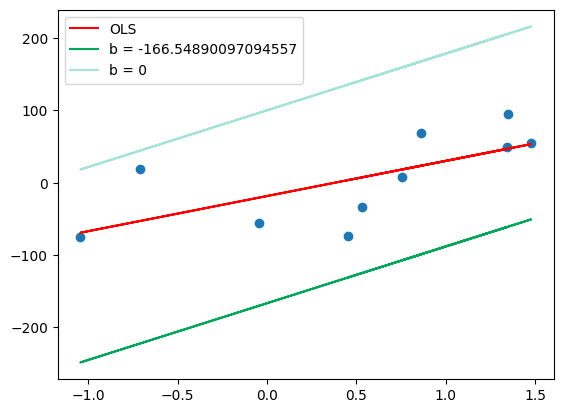

In [25]:

y_pred1 = ((78.35 * X) + b).reshape(10)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

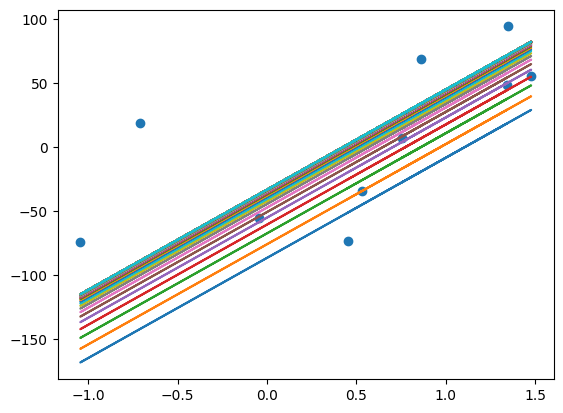

In [26]:

b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

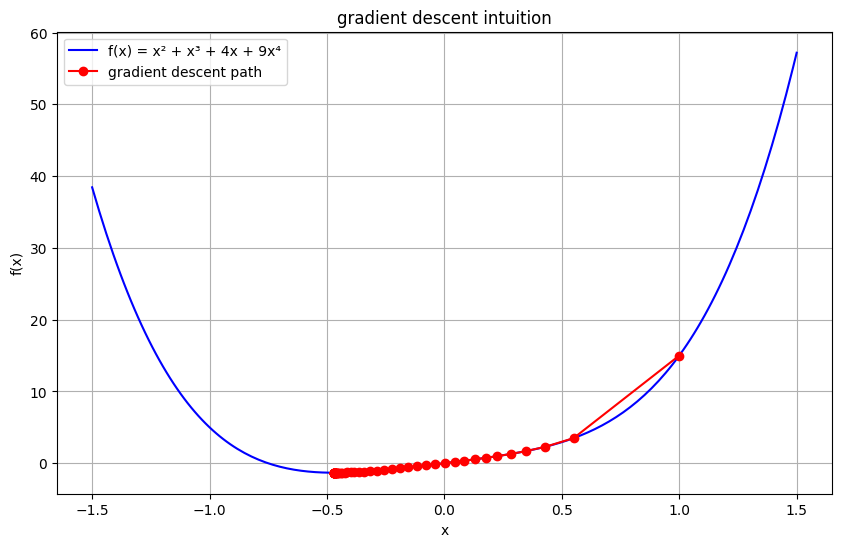

we started at: 1.0
we ended up at x = -0.4693
the function value there is: -1.3238


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# this is our function we want to mess with: f(x) = x² + x³ + 4x + 9x⁴
def function(x):
    return x**2 + x**3 + 4*x + 9*x**4

# here's the slope of our function (the derivative), shows us the downhill direction
# just some math: 2x + 3x² + 4 + 36x³
def derivative(x):
    return 2*x + 3*x**2 + 4 + 36*x**3

# this is where gradient descent does its thing - like sliding down a hill
def gradient_descent(starting_x, learning_rate, num_iterations):
    x = starting_x  # where we start our trip
    history = [x]   # keeping track of where we go

    # time to take steps down the slope
    for i in range(num_iterations):
        gradient = derivative(x)  # figure out how steep it is
        x = x - learning_rate * gradient  # step downhill, size based on learning_rate
        history.append(x)  # jot down where we’ve been

        # let’s see it in action
        clear_output(wait=True)
        plot_progress(history)
        time.sleep(0.1)  # hang out a bit so we can watch each move

    return x, history  # where we landed and the path we took

# this makes a neat picture of what’s going on
def plot_progress(history):
    # set up points to draw the function’s curve
    x_vals = np.linspace(-1.5, 1.5, 200)  # a good range to see everything
    y_vals = function(x_vals)  # what the function looks like

    plt.figure(figsize=(10, 6))  # make the graph a nice size

    # draw the function as a blue line
    plt.plot(x_vals, y_vals, 'b-', label='f(x) = x² + x³ + 4x + 9x⁴')

    # show our path with red dots and lines - like dropping pins
    history_y = [function(x) for x in history]
    plt.plot(history, history_y, 'ro-', label='gradient descent path')

    # spruce it up a bit
    plt.title('gradient descent intuition')  # slap a title on it
    plt.xlabel('x')  # label the x-axis
    plt.ylabel('f(x)')  # label the y-axis
    plt.legend()  # toss in a legend to explain stuff
    plt.grid(True)  # add a grid to keep things clear
    plt.show()  # let’s see the result

# time to kick things off!
starting_point = 1.0  # where we’re jumping in
learning_rate = 0.01  # how big our steps are - keeping it small for this one
iterations = 50       # how many steps we’ll take

# let’s roll and see where we end up
final_x, path = gradient_descent(starting_point, learning_rate, iterations)

# spill the beans on how it went
print(f"we started at: {starting_point}")
print(f"we ended up at x = {final_x:.4f}")
print(f"the function value there is: {function(final_x):.4f}")